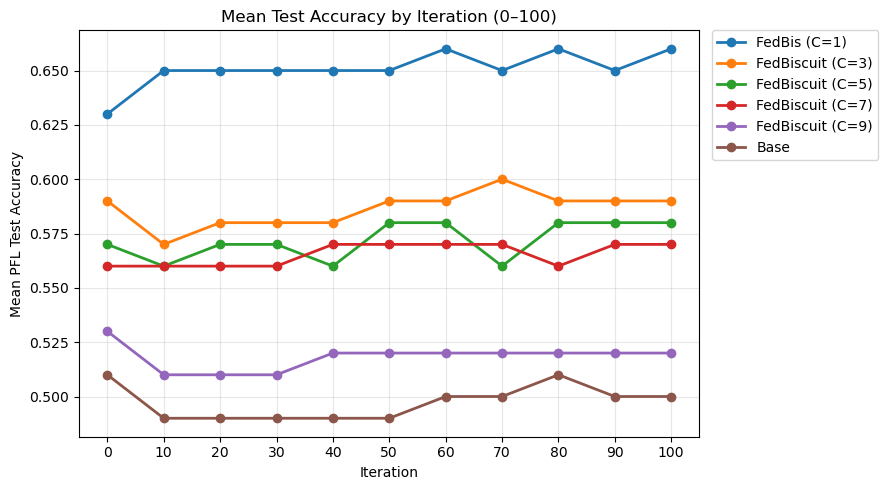

In [1]:
import matplotlib.pyplot as plt

# 0..100 (간격 10)
steps = [0,10,20,30,40,50,60,70,80,90,100]

alg_series = {
    "FedBis (C=1)":            [0.63, 0.65, 0.65, 0.65, 0.65, 0.65, 0.66, 0.65, 0.66, 0.65, 0.66],
    "FedBiscuit (C=3)":  [0.59, 0.57, 0.58, 0.58, 0.58, 0.59, 0.59, 0.60, 0.59, 0.59, 0.59],
    "FedBiscuit (C=5)":  [0.57, 0.56, 0.57, 0.57, 0.56, 0.58, 0.58, 0.56, 0.58, 0.58, 0.58],
    "FedBiscuit (C=7)":  [0.56, 0.56, 0.56, 0.56, 0.57, 0.57, 0.57, 0.57, 0.56, 0.57, 0.57],
    "FedBiscuit (C=9)": [0.53, 0.51, 0.51, 0.51, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52],    
    # "FedBiscuit (C=10)": [0.57, 0.54, 0.55, 0.56, 0.56, 0.56, 0.58, 0.57, 0.57, 0.57, 0.58],
    "Base": [0.51, 0.49, 0.49, 0.49, 0.49, 0.49, 0.50, 0.50, 0.51, 0.50, 0.50],  
}

plt.figure(figsize=(9, 5))
for name, ys in alg_series.items():
    plt.plot(steps, ys, marker='o', linewidth=2, label=name)  # 슬라이싱 제거

plt.title("Mean Test Accuracy by Iteration (0–100)")
plt.xlabel("Iteration")
plt.ylabel("Mean PFL Test Accuracy")
plt.xticks(steps)
plt.grid(True, alpha=0.3)
# plt.legend()
plt.legend(
    loc="upper left", 
    bbox_to_anchor=(1.02, 1),   # plot 영역 오른쪽 바깥
    borderaxespad=0.
)
plt.tight_layout()

plt.savefig("./fed_alg_comparison_0_100.png", dpi=200)
plt.show()


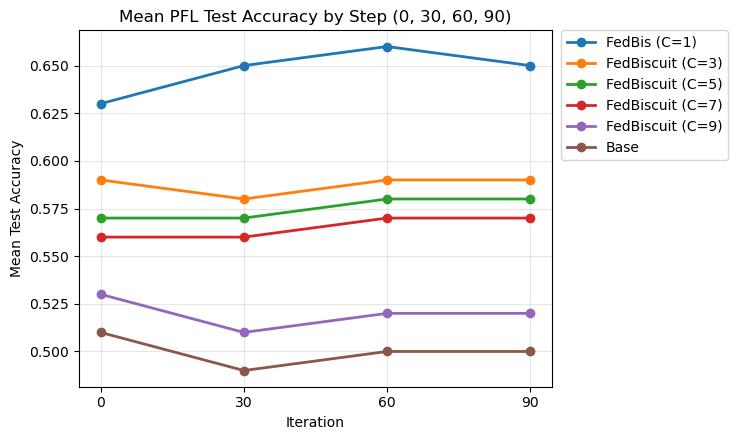

In [ ]:
import matplotlib.pyplot as plt

steps_full = [0,10,20,30,40,50,60,70,80,90,100]
select_steps = [0,30,60,90]

alg_series = {
    "FedBis (C=1)":            [0.63, 0.65, 0.65, 0.65, 0.65, 0.65, 0.66, 0.65, 0.66, 0.65, 0.66],
    "FedBiscuit (C=3)":  [0.59, 0.57, 0.58, 0.58, 0.58, 0.59, 0.59, 0.60, 0.59, 0.59, 0.59],
    "FedBiscuit (C=5)":  [0.57, 0.56, 0.57, 0.57, 0.56, 0.58, 0.58, 0.56, 0.58, 0.58, 0.58],
    "FedBiscuit (C=7)":  [0.56, 0.56, 0.56, 0.56, 0.57, 0.57, 0.57, 0.57, 0.56, 0.57, 0.57],
    "FedBiscuit (C=9)": [0.53, 0.51, 0.51, 0.51, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52, 0.52],    
    # "FedBiscuit (C=10)": [0.57, 0.54, 0.55, 0.56, 0.56, 0.56, 0.58, 0.57, 0.57, 0.57, 0.58],
    "Base": [0.51, 0.49, 0.49, 0.49, 0.49, 0.49, 0.50, 0.50, 0.51, 0.50, 0.50],  
}

idx = {s:i for i,s in enumerate(steps_full)}
ys_selected = {name: [ys[idx[s]] for s in select_steps] for name, ys in alg_series.items()}

plt.figure(figsize=(7.5, 4.5))
for name, ys in ys_selected.items():
    plt.plot(select_steps, ys, marker='o', linewidth=2, label=name)

plt.title("Mean PFL Test Accuracy by Step (0, 30, 60, 90)")
plt.xlabel("Iteration")
plt.ylabel("Mean Test Accuracy")
plt.xticks(select_steps)
plt.grid(True, alpha=0.3)
# plt.legend()
plt.legend(
    loc="upper left", 
    bbox_to_anchor=(1.02, 1),   # plot 영역 오른쪽 바깥
    borderaxespad=0.
)
plt.tight_layout()

plt.savefig("./fed_alg_comparison_0_30_60_90.png", dpi=200)
plt.show()


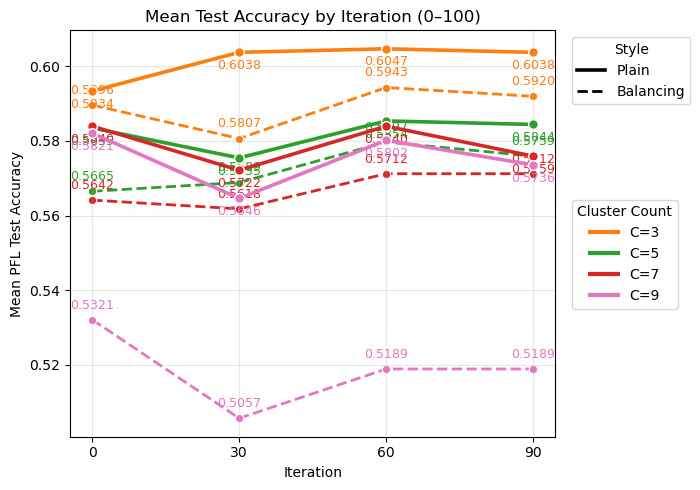

In [2]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# ----- Raw Data (no rounding) -----
raw = {
    "Plain (C=3)":       {0: 0.5933962264150942, 10: 0.6108490566037735, 20: 0.5957547169811319, 30: 0.6037735849056604, 40: 0.6018867924528299, 50: 0.5981132075471699, 60: 0.6047169811320754, 70: 0.6099056603773585, 80: 0.6084905660377355, 90: 0.6037735849056604, 100: 0.605188679245283},
    "Plain (C=5)":       {0: 0.583490566037736, 10: 0.5783018867924528, 20: 0.5735849056603773, 30: 0.5754716981132075, 40: 0.5731132075471698, 50: 0.5797169811320755, 60: 0.5853773584905662, 70: 0.584433962264151, 80: 0.5915094339622643, 90: 0.5844339622641509, 100: 0.5839622641509434},
    "Plain (C=7)":       {0: 0.5839622641509434, 10: 0.5641509433962264, 20: 0.555188679245283, 30: 0.5721698113207546, 40: 0.5589622641509433, 50: 0.5716981132075472, 60: 0.5839622641509434, 70: 0.585377358490566, 80: 0.5877358490566036, 90: 0.5759433962264152, 100: 0.5698113207547169},
    "Plain (C=9)":       {0: 0.582075471698113, 10: 0.5693396226415096, 20: 0.5650943396226416, 30: 0.5646226415094339, 40: 0.5547169811320755, 50: 0.5716981132075473, 60: 0.5801886792452831, 70: 0.5773584905660376, 80: 0.5792452830188679, 90: 0.5735849056603775, 100: 0.5735849056603775},
    # "Plain (C=10)":      {0: 0.5632075471698114, 10: 0.5561320754716981, 20: 0.5495283018867925, 30: 0.5452830188679246, 40: 0.5518867924528302, 50: 0.5547169811320753, 60: 0.5617924528301886, 70: 0.5603773584905659, 80: 0.5702830188679244, 90: 0.5693396226415095, 100: 0.5688679245283019},

    "Balancing (C=3)":   {0: 0.589622641509434, 10: 0.574056603773585, 20: 0.579245283018868, 30: 0.5806603773584904, 40: 0.5797169811320755, 50: 0.5877358490566037, 60: 0.5943396226415092, 70: 0.6033018867924527, 80: 0.5938679245283021, 90: 0.5919811320754716, 100: 0.5863207547169812},
    "Balancing (C=5)":   {0: 0.566509433962264, 10: 0.5613207547169813, 20: 0.5660377358490567, 30: 0.568867924528302, 40: 0.5641509433962264, 50: 0.5801886792452828, 60: 0.5797169811320755, 70: 0.5641509433962263, 80: 0.5787735849056604, 90: 0.5759433962264151, 100: 0.5816037735849057},
    "Balancing (C=7)":   {0: 0.5641509433962263, 10: 0.5608490566037736, 20: 0.5580188679245283, 30: 0.5617924528301886, 40: 0.5693396226415094, 50: 0.569811320754717, 60: 0.5712264150943397, 70: 0.569811320754717, 80: 0.5627358490566038, 90: 0.5712264150943396, 100: 0.5707547169811321},
    "Balancing (C=9)":   {0: 0.5320754716981133, 10: 0.5099056603773585, 20: 0.5136792452830189, 30: 0.5056603773584906, 40: 0.5150943396226416, 50: 0.5202830188679246, 60: 0.5188679245283018, 70: 0.5249999999999998, 80: 0.5240566037735849, 90: 0.518867924528302, 100: 0.5235849056603773},
    # "Balancing (C=10)":  {0: 0.5660377358490565, 10: 0.5438679245283018, 20: 0.5547169811320753, 30: 0.5570754716981133, 40: 0.5570754716981133, 50: 0.5570754716981132, 60: 0.57688679245283, 70: 0.5702830188679244, 80: 0.5735849056603772, 90: 0.5712264150943397, 100: 0.5759433962264152},

}

# only 0, 30, 60, 90
keep_steps = [0, 30, 60, 90]

# Colors: C=3 orange, C=5 green, C=7 red
color_map = {
    3: "#ff7f0e",  # orange
    5: "#2ca02c",  # green
    7: "#d62728",  # red
    9: "#e377c2",  # pink
}

fig, ax = plt.subplots(figsize=(9, 5))

# --- Balancing first (dashed) with lower zorder ---
for name, d in raw.items():
    if not name.startswith("Balancing"):
        continue
    c_val = int(name.split("C=")[1].split(")")[0])
    ys = [d[s] for s in keep_steps]
    ax.plot(
        keep_steps, ys, linestyle="--", marker='o', linewidth=2,
        color=color_map[c_val], zorder=1,
        markeredgecolor="white", markeredgewidth=0.8, markersize=6,
        label=name
    )
    # annotate values with 4 decimals
    for x, y in zip(keep_steps, ys):
        ax.annotate(f"{y:.4f}", (x, y), textcoords="offset points",
                    xytext=(0, 8), ha='center', fontsize=9, color=color_map[c_val])

# --- Plain next (solid) with higher zorder ---
for name, d in raw.items():
    if not name.startswith("Plain"):
        continue
    c_val = int(name.split("C=")[1].split(")")[0])
    ys = [d[s] for s in keep_steps]
    ax.plot(
        keep_steps, ys, linestyle="-", marker='o', linewidth=2.6,
        color=color_map[c_val], zorder=3,
        markeredgecolor="white", markeredgewidth=1.0, markersize=7,
        label=name
    )
    # annotate values with 4 decimals
    for x, y in zip(keep_steps, ys):
        ax.annotate(f"{y:.4f}", (x, y), textcoords="offset points",
                    xytext=(0, -12), ha='center', fontsize=9, color=color_map[c_val])

ax.set_title("Mean Test Accuracy by Iteration (0–100)")
ax.set_xlabel("Iteration")
ax.set_ylabel("Mean PFL Test Accuracy")
ax.set_xticks(keep_steps)
ax.grid(True, alpha=0.3)

# Split legends
style_handles = [
    Line2D([0], [0], color="black", lw=2.6, linestyle="-",  label="Plain"),
    Line2D([0], [0], color="black", lw=2.0, linestyle="--", label="Balancing"),
]
leg1 = ax.legend(handles=style_handles, title="Style",
                 loc="upper left", bbox_to_anchor=(1.02, 1))
ax.add_artist(leg1)

color_handles = [
    Line2D([0], [0], color=color_map[3],  lw=3, label="C=3"),
    Line2D([0], [0], color=color_map[5],  lw=3, label="C=5"),
    Line2D([0], [0], color=color_map[7],  lw=3, label="C=7"),
    Line2D([0], [0], color=color_map[9],  lw=3, label="C=9"),
]
ax.legend(handles=color_handles, title="Cluster Count",
          loc="upper left", bbox_to_anchor=(1.02, 0.6))

fig.tight_layout(rect=[0, 0, 0.78, 1])
plt.savefig("plain_vs_balancing_by_C_0_30_60_90_raw_4dp.png", dpi=200, bbox_inches='tight')
plt.show()

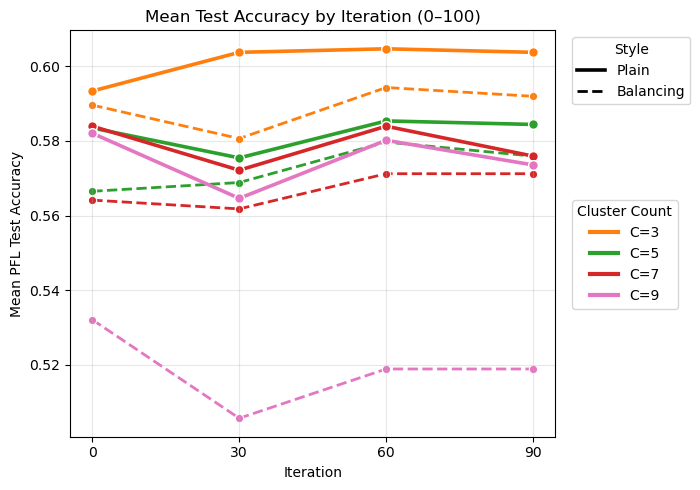

In [3]:
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D

# ----- Raw Data (no rounding) -----
raw = {
    "Plain (C=3)":       {0: 0.5933962264150942, 10: 0.6108490566037735, 20: 0.5957547169811319, 30: 0.6037735849056604, 40: 0.6018867924528299, 50: 0.5981132075471699, 60: 0.6047169811320754, 70: 0.6099056603773585, 80: 0.6084905660377355, 90: 0.6037735849056604, 100: 0.605188679245283},
    "Plain (C=5)":       {0: 0.583490566037736, 10: 0.5783018867924528, 20: 0.5735849056603773, 30: 0.5754716981132075, 40: 0.5731132075471698, 50: 0.5797169811320755, 60: 0.5853773584905662, 70: 0.584433962264151, 80: 0.5915094339622643, 90: 0.5844339622641509, 100: 0.5839622641509434},
    "Plain (C=7)":       {0: 0.5839622641509434, 10: 0.5641509433962264, 20: 0.555188679245283, 30: 0.5721698113207546, 40: 0.5589622641509433, 50: 0.5716981132075472, 60: 0.5839622641509434, 70: 0.585377358490566, 80: 0.5877358490566036, 90: 0.5759433962264152, 100: 0.5698113207547169},
    "Plain (C=9)":       {0: 0.582075471698113, 10: 0.5693396226415096, 20: 0.5650943396226416, 30: 0.5646226415094339, 40: 0.5547169811320755, 50: 0.5716981132075473, 60: 0.5801886792452831, 70: 0.5773584905660376, 80: 0.5792452830188679, 90: 0.5735849056603775, 100: 0.5735849056603775},
    # "Plain (C=10)":      {0: 0.5632075471698114, 10: 0.5561320754716981, 20: 0.5495283018867925, 30: 0.5452830188679246, 40: 0.5518867924528302, 50: 0.5547169811320753, 60: 0.5617924528301886, 70: 0.5603773584905659, 80: 0.5702830188679244, 90: 0.5693396226415095, 100: 0.5688679245283019},

    "Balancing (C=3)":   {0: 0.589622641509434, 10: 0.574056603773585, 20: 0.579245283018868, 30: 0.5806603773584904, 40: 0.5797169811320755, 50: 0.5877358490566037, 60: 0.5943396226415092, 70: 0.6033018867924527, 80: 0.5938679245283021, 90: 0.5919811320754716, 100: 0.5863207547169812},
    "Balancing (C=5)":   {0: 0.566509433962264, 10: 0.5613207547169813, 20: 0.5660377358490567, 30: 0.568867924528302, 40: 0.5641509433962264, 50: 0.5801886792452828, 60: 0.5797169811320755, 70: 0.5641509433962263, 80: 0.5787735849056604, 90: 0.5759433962264151, 100: 0.5816037735849057},
    "Balancing (C=7)":   {0: 0.5641509433962263, 10: 0.5608490566037736, 20: 0.5580188679245283, 30: 0.5617924528301886, 40: 0.5693396226415094, 50: 0.569811320754717, 60: 0.5712264150943397, 70: 0.569811320754717, 80: 0.5627358490566038, 90: 0.5712264150943396, 100: 0.5707547169811321},
    "Balancing (C=9)":   {0: 0.5320754716981133, 10: 0.5099056603773585, 20: 0.5136792452830189, 30: 0.5056603773584906, 40: 0.5150943396226416, 50: 0.5202830188679246, 60: 0.5188679245283018, 70: 0.5249999999999998, 80: 0.5240566037735849, 90: 0.518867924528302, 100: 0.5235849056603773},
    # "Balancing (C=10)":  {0: 0.5660377358490565, 10: 0.5438679245283018, 20: 0.5547169811320753, 30: 0.5570754716981133, 40: 0.5570754716981133, 50: 0.5570754716981132, 60: 0.57688679245283, 70: 0.5702830188679244, 80: 0.5735849056603772, 90: 0.5712264150943397, 100: 0.5759433962264152},

}

# only 0, 30, 60, 90
keep_steps = [0, 30, 60, 90]

# Colors: C=3 orange, C=5 green, C=7 red
color_map = {
    3: "#ff7f0e",  # orange
    5: "#2ca02c",  # green
    7: "#d62728",  # red
    9: "#e377c2",  # pink
}

fig, ax = plt.subplots(figsize=(9, 5))

SHOW_VALUES = False  # <- 숫자 라벨 표시 여부

# --- Balancing (dashed)
for name, d in raw.items():
    if not name.startswith("Balancing"):
        continue
    c_val = int(name.split("C=")[1].split(")")[0])
    ys = [d[s] for s in keep_steps]
    ax.plot(keep_steps, ys, linestyle="--", marker='o', linewidth=2,
            color=color_map[c_val], zorder=1,
            markeredgecolor="white", markeredgewidth=0.8, markersize=6,
            label=name)
    if SHOW_VALUES:
        for x, y in zip(keep_steps, ys):
            ax.annotate(f"{y:.4f}", (x, y), textcoords="offset points",
                        xytext=(0, 8), ha='center', fontsize=9, color=color_map[c_val])

# --- Plain (solid)
for name, d in raw.items():
    if not name.startswith("Plain"):
        continue
    c_val = int(name.split("C=")[1].split(")")[0])
    ys = [d[s] for s in keep_steps]
    ax.plot(keep_steps, ys, linestyle="-", marker='o', linewidth=2.6,
            color=color_map[c_val], zorder=3,
            markeredgecolor="white", markeredgewidth=1.0, markersize=7,
            label=name)
    if SHOW_VALUES:
        for x, y in zip(keep_steps, ys):
            ax.annotate(f"{y:.4f}", (x, y), textcoords="offset points",
                        xytext=(0, -12), ha='center', fontsize=9, color=color_map[c_val])

ax.set_title("Mean Test Accuracy by Iteration (0–100)")
ax.set_xlabel("Iteration")
ax.set_ylabel("Mean PFL Test Accuracy")
ax.set_xticks(keep_steps)
ax.grid(True, alpha=0.3)

# Split legends
style_handles = [
    Line2D([0], [0], color="black", lw=2.6, linestyle="-",  label="Plain"),
    Line2D([0], [0], color="black", lw=2.0, linestyle="--", label="Balancing"),
]
leg1 = ax.legend(handles=style_handles, title="Style",
                 loc="upper left", bbox_to_anchor=(1.02, 1))
ax.add_artist(leg1)

color_handles = [
    Line2D([0], [0], color=color_map[3],  lw=3, label="C=3"),
    Line2D([0], [0], color=color_map[5],  lw=3, label="C=5"),
    Line2D([0], [0], color=color_map[7],  lw=3, label="C=7"),
    Line2D([0], [0], color=color_map[9],  lw=3, label="C=9"),
]
ax.legend(handles=color_handles, title="Cluster Count",
          loc="upper left", bbox_to_anchor=(1.02, 0.6))

fig.tight_layout(rect=[0, 0, 0.78, 1])
plt.savefig("plain_vs_balancing_by_C_0_30_60_90_raw_4dp.png", dpi=200, bbox_inches='tight')
plt.show()